# Задание 3 (со звёздочкой): нейронные текстуры (15 баллов)

- Склоньте репозиторий [Neural Textures](https://github.com/Dolorousrtur/neural-textures)
- По инструкции в README.md постройте докер контейнер и скачайте данные
- Используя код из `render_azure_person.py` и `utils/demo.py` в ноутбуке
    - достаньте пресохранённую нейронную текстуру (см. `utils/demo.py:L101`)
    - отрисуйте её первые 3 канала
    - Затем сделайте нейронный рендер (см. `utils/demo.py:L99,107`) и тоже отрисуйте его первые 3 канала
    - Пропустите нейрорендер сквозб рендерющую сеть, чтобы получить RGB картинку `utils/demo.py:L99,107`)

## Устеновка nvdiffrast
1. Склоньте репозиторий [nvdiffrast](https://github.com/NVlabs/nvdiffrast.git) и укажите путь к нему 

In [10]:
!git clone https://github.com/NVlabs/nvdiffrast.git
nvdiffrast_repo =  './nvdiffrast/'


2. Установите nvdiffrast

In [11]:
!apt-get update
!apt-get install -y --no-install-recommends \
    pkg-config \
    libglvnd0 \
    libgl1 \
    libglx0 \
    libegl1 \
    libgles2 \
    libglvnd-dev \
    libgl1-mesa-dev \
    libegl1-mesa-dev \
    libgles2-mesa-dev \
    cmake \
    curl
!cp {nvdiffrast_repo}/docker/10_nvidia.json ./usr/share/glvnd/egl_vendor.d/
!cd {nvdiffrast_repo} && pip install .



## Установка NeuralTextures


1. Склоньте репозаторий [NeuralTextures](https://github.com/Dolorousrtur/neural-textures)


In [12]:

!git clone https://github.com/Dolorousrtur/neural-textures.git

2. ВАЖНО: Перенесите этот ноутбук в корень папки `neural-textures/`
3. создайте conda envoronment

In [13]:
!conda create -n neuraltextures python=3.9 -y

In [14]:
!conda activate neuraltextures


4. Установите библиотеки и conda environvent для NeuralTextures

In [15]:


!conda install pytorch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 pytorch-cuda=11.8 -c pytorch -c nvidia -y
!conda install -c "nvidia/label/cuda-11.8.0" cuda-toolkit -y
!pip install git+https://github.com/rmbashirov/minimal_pytorch_rasterizer
!pip install ipykernel jupyter matplotlib numpy   nbconvert 
!pip install pandas Pillow plotly  scikit-image scikit-learn scipy tqdm trimesh imageio ninja
!pip install opencv-python smplx kornia


!pip install git+https://github.com/karfly/nvdiffrast_compute-capability_6.0
!pip install git+https://github.com/nghorbani/configer
!pip install git+https://github.com/qubvel/segmentation_models.pytorch
!pip install git+https://github.com/Cadene/pretrained-models.pytorch



## Собственно само задание

- Используя код из `render_azure_person.py` и `utils/demo.py` из репозитория NeuralTextures
    - достаньте пресохранённую нейронную текстуру (см. `utils/demo.py:L101`)
    - отрисуйте её первые 3 канала
    - Затем сделайте нейронный рендер (см. `utils/demo.py:L99,107`) и тоже отрисуйте его первые 3 канала
    - Пропустите нейрорендер сквозб рендерющую сеть, чтобы получить RGB картинку `utils/demo.py:L99,107`)


В итоге должны получиться такие картинки

Оценивание: +5 баллов за каждую из трёх картинок:
1. Neural Texture
2. Neural Render
3. RGB Render


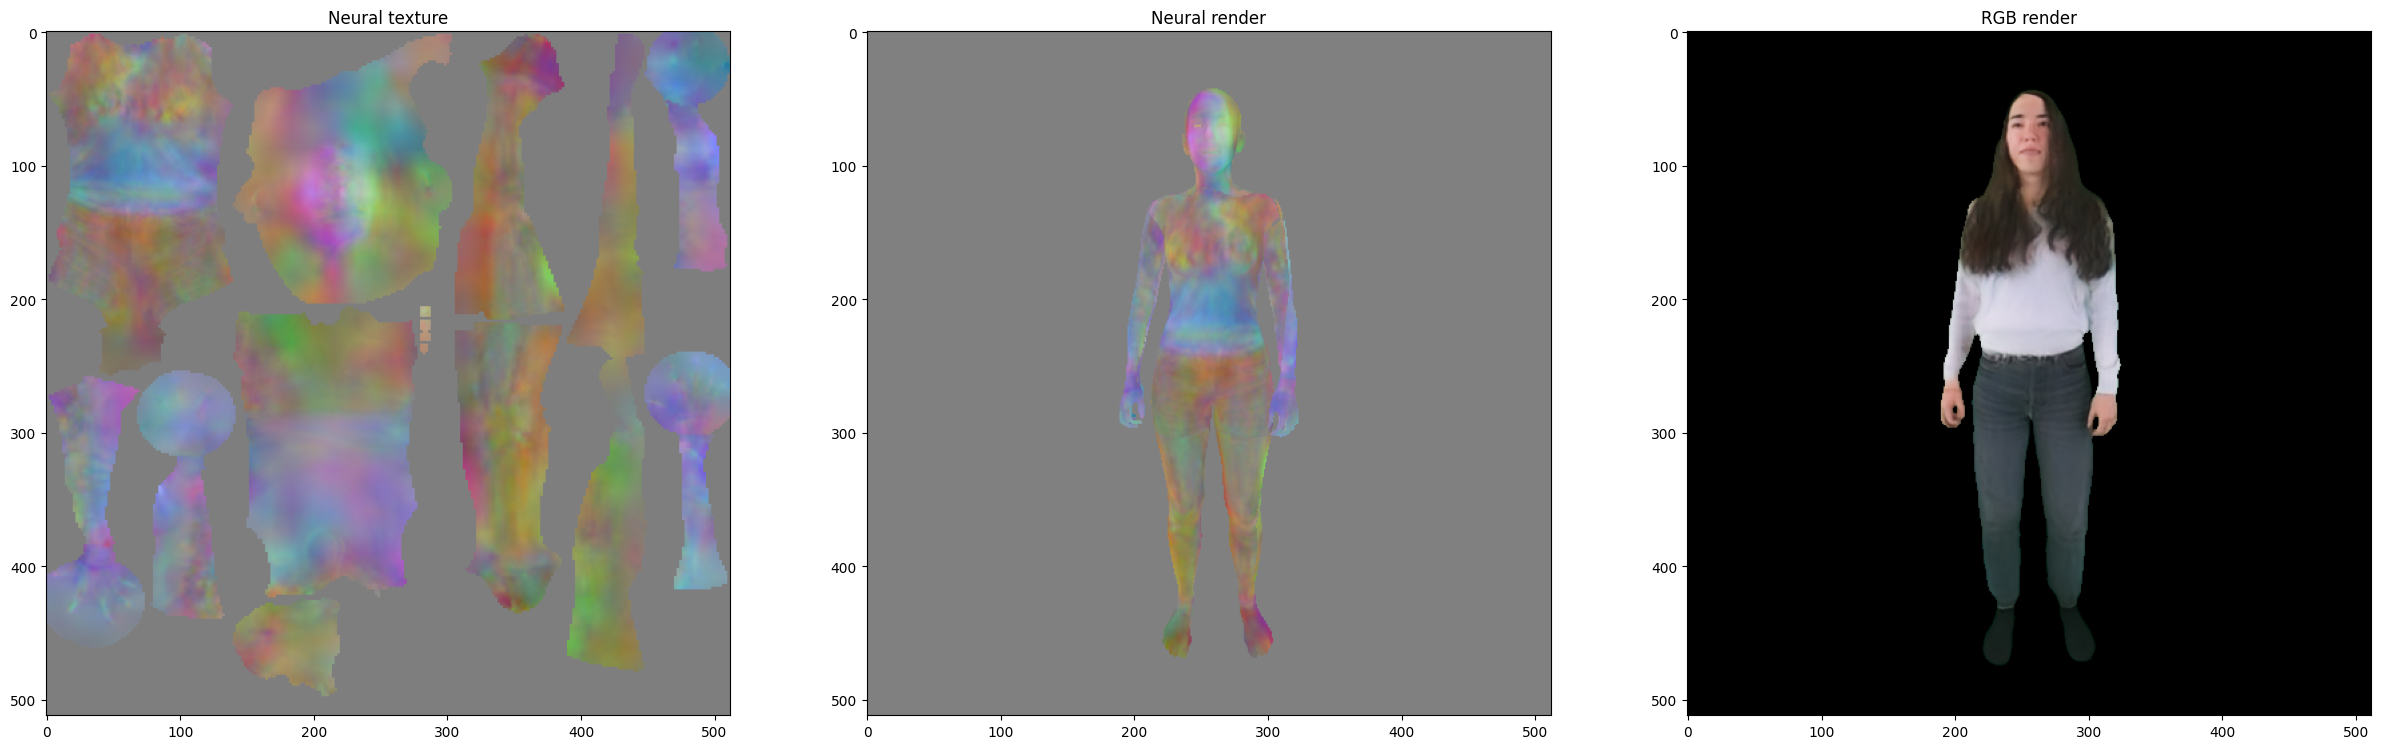

In [16]:
import argparse
import os

import cv2
import numpy as np

from utils.common import get_rotation_matrix, to_sigm, itt, tti
from utils.demo import DemoInferer
import torch
import matplotlib.pyplot as plt

In [17]:

checkpoint_path = f'data/checkpoint'
smplx_models_dir = f'data/smplx/'
imsize = 512
person_id = "03" # можно менять чтобы выбрать другого человека
renderer_path = os.path.join(checkpoint_path, 'renderer.pth')
ntex_path = os.path.join(checkpoint_path, 'ntex.pth')

texsegm_path = f'data/texsegm.npy'
inferer = DemoInferer(renderer_path, ntex_path, smplx_models_dir=smplx_models_dir, texsegm_path=texsegm_path, imsize=imsize,
                  pid_list=[person_id])


smplx_path = f'data/smplx_dicts/{person_id}.pkl'


In [18]:
# TODO


...




ntexture_np = None
nrender_np = None
fake_rgb_np = None

In [19]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(ntexture_np[..., :3])
ax[1].imshow(nrender_np[..., :3])
ax[2].imshow(fake_rgb_np)


ax[0].set_title("Neural texture")
ax[1].set_title("Neural render")
ax[2].set_title("RGB render")
plt.show()

: 